# 선형회귀로 보는 파라미터 갱신

저는 수학을 잘하지는 못합니다  
수학적인 함의나 의의보다는 `내가 생각하는 자연스러운 알고리즘이 조금 수학적 함의를 담고 있었다`라고 생각을 하게 만드는 것이  
컴퓨터 공학을 하는 사람들에게 수학의 필요성을 어필하는 방법일 것 같습니다    

선형회귀를 조금은 알고리즘적으로 접근을 해보고자 합니다  
캐글에서 연료소비량 데이터를 가져와서 진행하겠습니다  

> https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

In [1]:
import pandas as pd

data = pd.read_csv('./asset/FuelConsumption.csv')
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


앞의 데이터의 20개까지만 시각화를 해봤습니다  

In [2]:
X = data['ENGINE SIZE'].to_numpy()[:20]
Y = data['COEMISSIONS '].to_numpy()[:20]

In [3]:
X

array([1.6, 1.6, 3.2, 3.5, 1.8, 1.8, 1.8, 3. , 3.2, 1.8, 1.8, 2.8, 2.8,
       1.8, 1.8, 2.8, 2.8, 2.8, 2.8, 2.7])

In [4]:
Y

array([216, 205, 265, 301, 230, 219, 223, 306, 306, 251, 223, 285, 260,
       267, 246, 292, 288, 294, 306, 304])

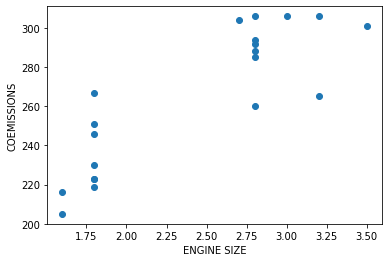

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('ENGINE SIZE')
plt.ylabel('COEMISSIONS')

plt.show()

정규방정식을 사용하면 바로 답을 만들 수 있다는 것을 알 수 있지만  
대신에 조금은 search하는 방식으로 접근을 해볼까 합니다   

1. 아무 직선이나 하나선택
2. 직선을 결정하는 $y = ax+b$에서 $a,b$를 변경  
3. $a,b$의 변경 값에 따라서 MSE를 계산 후 MSE가 가장 작은 $a,b$를 선택

이를 n번정도 반복을 합니다  

In [82]:
def GetEpisode():
    episode = pd.DataFrame(columns  = ['w' , 'b' , 'MSE'])
    episode.loc[0]  = [0.5, 0.5 , 9996]
    episode.loc[1]  = [0.5, -0.5 , 9997]
    episode.loc[2]  = [-0.5, 0.5 , 9998]
    episode.loc[3]  = [-0.5, -0.5 , 9999]
    return episode


In [83]:
def MSE(w, b,target):
    Sum=0.00
    for i in range(len(X)):
        y_hat=X[i]*w+b
        Sum+=(target[i] - y_hat)**2
    mse = Sum / len(X)
    return mse

In [84]:
GetEpisode()

,w,b,MSE
0,0.5,0.5,9996.0
1,0.5,-0.5,9997.0
2,-0.5,0.5,9998.0
3,-0.5,-0.5,9999.0


In [85]:
W = 59
B = 160

In [86]:
episode = GetEpisode()
for x in episode.index:
    w = episode.loc[x,'w']
    b = episode.loc[x,'b']
    episode.loc[x , 'MSE'] = MSE(W+w,B+b , Y)
episode

,w,b,MSE
0,0.5,0.5,1929.37825
1,0.5,-0.5,1851.28825
2,-0.5,0.5,1735.92425
3,-0.5,-0.5,1662.65425


In [87]:
episode.nsmallest(1,'MSE')['w'].item() , episode.nsmallest(1,'MSE')['b'].item()


(-0.5, -0.5)

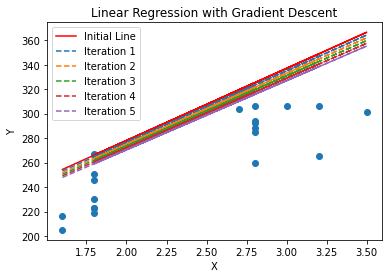

In [88]:
episode = GetEpisode()
plt.scatter(X, Y)
plt.plot(X, W * X + B, color='red', label='Initial Line')

# episode 반복하여 MSE가 최소가 되는 w, b 찾기
for _ in range(5):
    for x in episode.index:
        w = episode.loc[x, 'w']
        b = episode.loc[x, 'b']
        episode.loc[x, 'MSE'] = MSE(W + w, B + b,  Y)
    
    # 최소 MSE에 해당하는 w, b 찾기
    min_mse_idx = episode['MSE'].idxmin()
    min_w = episode.loc[min_mse_idx, 'w']
    min_b = episode.loc[min_mse_idx, 'b']
    
    # MSE가 최소가 되는 직선 그리기
    plt.plot(X, (W + min_w) * X + (B + min_b), linestyle='--', label=f'Iteration {_+1}')
    
    # w, b 갱신
    W += min_w
    B += min_b

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.show()

In [89]:
import numpy as np
import plotly.graph_objects as go

episode = GetEpisode()

# 초기 데이터 포인트 생성
fig = go.Figure()

# 초기 데이터 포인트 추가
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(color='blue'),
    name='Data Points'
))

# 초기 직선 추가
fig.add_trace(go.Scatter(
    x=X,
    y=W * X + B,
    mode='lines',
    line=dict(color='red'),
    name='Initial Line'
))

# episode 반복하여 MSE가 최소가 되는 w, b 찾기 및 직선 추가
for i in range(5):
    for x in episode.index:
        w = episode.loc[x, 'w']
        b = episode.loc[x, 'b']
        episode.loc[x, 'MSE'] = MSE(W + w, B + b, Y)
    
    # 최소 MSE에 해당하는 w, b 찾기
    min_mse_idx = episode['MSE'].idxmin()
    min_w = episode.loc[min_mse_idx, 'w']
    min_b = episode.loc[min_mse_idx, 'b']
    
    # MSE가 최소가 되는 직선 추가
    fig.add_trace(go.Scatter(
        x=X,
        y=(W + min_w) * X + (B + min_b),
        mode='lines',
        line=dict(color='blue', dash='dash'),
        name=f'Iteration {i+1}'
    ))
    
    # w, b 갱신
    W += min_w
    B += min_b

# 레이아웃 설정
fig.update_layout(
    xaxis_title='X',
    yaxis_title='Y',
    title='Linear Regression with Gradient Descent'
)

# 그래프 표시
fig.show()


     w    b        MSE
0  0.5  0.5  836.01825
1  0.5 -0.5  792.02825
2 -0.5  0.5  728.59425
3 -0.5 -0.5  689.42425


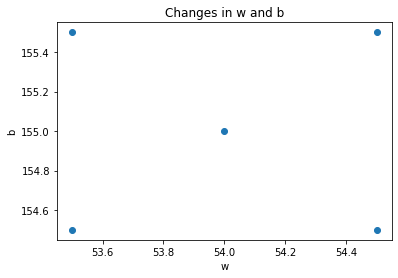

In [90]:
episode = GetEpisode()

# 리스트 초기화
w_values = []
b_values = []

w_values.append(W)
b_values.append(B)

# 반복문을 통해 w, b 및 MSE 계산
for x in episode.index:
    w = episode.loc[x, 'w']
    b = episode.loc[x, 'b']
    w_values.append(W + w)  # W + w 값을 리스트에 추가
    b_values.append(B + b)  # B + b 값을 리스트에 추가
    episode.loc[x, 'MSE'] = MSE(W + w, B + b, Y)

# 데이터프레임 출력
print(episode)

# w_values와 b_values 시각화 (scatter plot)
plt.scatter(w_values, b_values)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Changes in w and b')
plt.show()


저는 이러한 완전탐색 알고리즘이 다변수 미적분학의 기호로 쓸 수 있을 것 같습니다  

$\frac{\partial{MSE}}{\partial{w}} + \frac{\partial{MSE}}{\partial{b}}$

In [91]:
import numpy as np
import plotly.graph_objects as go

episode = GetEpisode()

# 리스트 초기화
w_values = []
b_values = []
mse_values = []

# 반복문을 통해 w, b 및 MSE 계산
for x in episode.index:
    w = episode.loc[x, 'w']
    b = episode.loc[x, 'b']
    w_values.append(w)
    b_values.append(b)
    mse = MSE(w, b, Y)
    mse_values.append(mse)
    episode.loc[x, 'MSE'] = mse

# 3D Scatter Plot 생성
fig = go.Figure(data=go.Scatter3d(
    x=w_values,
    y=b_values,
    z=mse_values,
    mode='markers',
    marker=dict(
        size=5,
        color='red',                # 마커 색상 설정
        opacity=0.8
    )
))

# 각 w, b 값에 대한 직선 추가
for i in range(len(w_values)):
    w = w_values[i]
    b = b_values[i]
    x_vals = np.linspace(min(X), max(X), 100)  # X 데이터 범위 내에서 x 값 생성
    y_vals = w * x_vals + b                    # 직선 방정식 계산
    fig.add_trace(go.Scatter3d(
        x=x_vals,
        y=np.full_like(x_vals, b),             # 직선의 y 값은 b로 고정
        z=MSE(w, b, Y) * np.ones_like(x_vals), # 직선의 z 값은 해당 w, b에 대한 MSE로 고정
        mode='lines',
        line=dict(
            color='blue',                      # 직선의 색상 설정
            width=2                            # 직선의 두께 설정
        ),
        showlegend=False                       # 범례에서 숨김
    ))

# 중심점 계산
center_w = np.mean(w_values)
center_b = np.mean(b_values)
center_mse = np.mean(mse_values)

# 중심점 추가
fig.add_trace(go.Scatter3d(
    x=[center_w],
    y=[center_b],
    z=[center_mse],
    mode='markers',
    marker=dict(
        size=10,
        color='green',              # 중심점 색상 설정
        opacity=1,
        symbol='x',                 # 중심점 심볼 설정
    ),
    name='Center Point'
))

# 각 포인트와 중심점 연결선 추가
for i in range(len(w_values)):
    fig.add_trace(go.Scatter3d(
        x=[w_values[i], center_w],
        y=[b_values[i], center_b],
        z=[mse_values[i], center_mse],
        mode='lines',
        line=dict(
            color='black',           # 연결선 색상 설정
            width=1                  # 연결선 두께 설정
        ),
        showlegend=False            # 범례에서 숨김
    ))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='w',            # x 축 레이블 설정
        yaxis_title='b',            # y 축 레이블 설정
        zaxis_title='MSE',          # z 축 레이블 설정
    ),
    title='MSE as a function of w and b with fitted lines'
)

# 그래프 표시
fig.show()


### Think

* 우리가 하는 일종의 완전 탐색 기법 알고리즘인데  
이것도 잘 셋팅을 해서 보면 일종의 미분을 이용하는 것이 아닐까?  

* 머신러닝에서 사용되는 learning rate, 초기화의 문제도 위 상황에서는 설명이 가능하지 않을까?   

* 이러한 접근을 바탕으로 경사하강법이라는게 말이 되는 알고리즘이 아닐까?  

라는 것들이 생각났습니다  